In [1]:
#installing yfinance to download the S&P500 index historical price data

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import pandas, os, and yfinance packages for our analysis

In [4]:
import pandas as pd
import yfinance as yf
import os

In [5]:
#downloading the S&P500 index historical price data 1927-2024

In [6]:
sp500 = yf.Ticker("^GSPC")

In [7]:
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,0.0,0.0
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,0.0,0.0
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,0.0,0.0


In [8]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00',
               '2024-03-11 00:00:00-04:00', '2024-03-12 00:00:00-04:00',
               '2024-03-13 00:00:00-04:00', '2024-03-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24166, freq=None)

In [9]:
#Cleaning and visualizing the data

<Axes: xlabel='Date'>

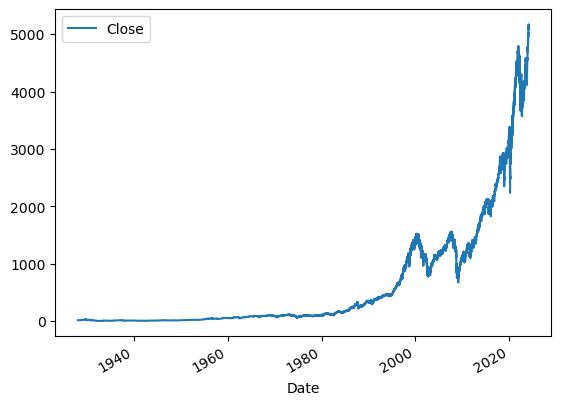

In [10]:
sp500.plot.line(y="Close", use_index=True)

In [11]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [12]:
#Setting up our target for machine learning

In [13]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,5117.939941
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,5175.270020
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059


In [14]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,5117.939941,0
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,5175.270020,1
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0


In [15]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,5117.939941,0
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,5175.270020,1
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0


In [16]:
#training an initial machine learning model

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds

Date
2023-10-20 00:00:00-04:00    0
2023-10-23 00:00:00-04:00    0
2023-10-24 00:00:00-04:00    1
2023-10-25 00:00:00-04:00    1
2023-10-26 00:00:00-04:00    0
                            ..
2024-03-08 00:00:00-05:00    0
2024-03-11 00:00:00-04:00    0
2024-03-12 00:00:00-04:00    0
2024-03-13 00:00:00-04:00    0
2024-03-14 00:00:00-04:00    0
Length: 100, dtype: int32

In [19]:
precision_score(test["Target"], preds)


0.6086956521739131

<Axes: xlabel='Date'>

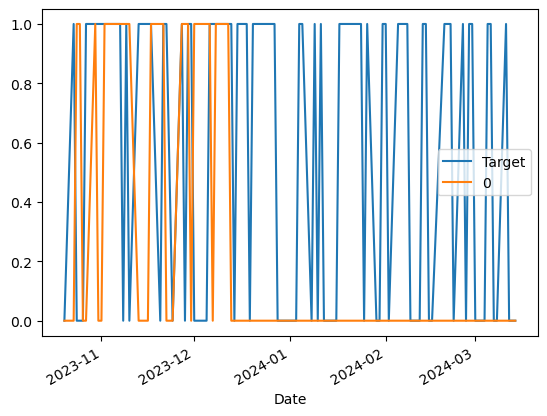

In [20]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [21]:
#building a backtesting system

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [23]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [29]:
predictions = backtest(sp500, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

Predictions
0    3520
1    2596
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534663
0    0.465337
Name: count, dtype: float64

In [ ]:
#improved model with extra predictor columns

In [30]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,5117.939941,0,0.996725,1.0,1.000900,2.0,1.047526,37.0,1.149545,141.0,1.263446,534.0
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,5175.270020,1,0.999439,0.0,1.000285,2.0,1.044662,36.0,1.146956,141.0,1.261186,533.0
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0,1.005570,1.0,1.007685,3.0,1.054685,36.0,1.158500,141.0,1.274412,534.0


In [34]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,5117.939941,0,0.996725,1.0,1.000900,2.0,1.047526,37.0,1.149545,141.0,1.263446,534.0
2024-03-11 00:00:00-04:00,5111.959961,5124.660156,5091.140137,5117.939941,3896430000,5175.270020,1,0.999439,0.0,1.000285,2.0,1.044662,36.0,1.146956,141.0,1.261186,533.0
2024-03-12 00:00:00-04:00,5134.299805,5179.870117,5114.479980,5175.270020,4080510000,5165.310059,0,1.005570,1.0,1.007685,3.0,1.054685,36.0,1.158500,141.0,1.274412,534.0


In [35]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [36]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [37]:
predictions = backtest(sp500, model, new_predictors)

In [38]:
predictions["Predictions"].value_counts()

Predictions
0.0    4284
1.0     832
Name: count, dtype: int64

In [39]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077

In [40]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.544371
0    0.455629
Name: count, dtype: float64

In [41]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-03-08 00:00:00-05:00,0,0.0
2024-03-11 00:00:00-04:00,1,0.0
2024-03-12 00:00:00-04:00,0,0.0


In [45]:
sp500.to_csv(r'C:\Users\ronin\Desktop\Predict The Stock Market With Machine Learning And Python project notes\S&P500.csv')